In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('../TextFiles/smsspamcollection.tsv',sep='\t')

In [4]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [5]:
df.isnull()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [6]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

<AxesSubplot:>

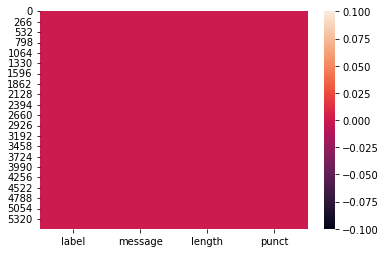

In [7]:
sns.heatmap(df.isnull())

In [8]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [9]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [10]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

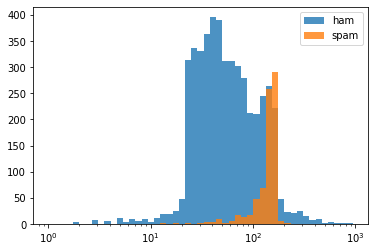

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [12]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

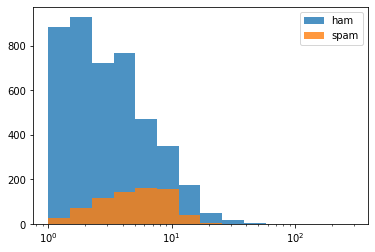

In [13]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df[['length','punct']]
y = df['label']

# Train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
print('X_train.shape',X_train.shape)
print('X_test.shape',X_test.shape)

X_train.shape (3900, 2)
X_test.shape (1672, 2)


In [17]:
print('y_train.shape',y_train.shape)
print('y_test.shape',y_test.shape)

y_train.shape (3900,)
y_test.shape (1672,)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
params = [{'tol':[0.0001,0.00001,0.001],
          'max_iter':[10,100,1000,10000]}]
# lr_model = LogisticRegression(solver='lgbfs')
lr_model = GridSearchCV(LogisticRegression(solver='lbfgs'),
                      param_grid=params,
                      )




In [19]:
lr_model.fit(X_train,y_train)

C:\Users\manda\anaconda3\envs\nlpenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\manda\anaconda3\envs\nlpenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'max_iter': [10, 100, 1000, 10000],
                          'tol': [0.0001, 1e-05, 0.001]}])

In [20]:
lr_model.best_params_

{'max_iter': 10, 'tol': 0.0001}

In [21]:
lr_model.score(X_train,y_train)

0.8571794871794872

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
predictions = lr_model.predict(X_test)

In [24]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [26]:
confusion_matrix(y_test,predictions)

array([[1425,   23],
       [ 220,    4]], dtype=int64)

In [27]:
df = pd.DataFrame(confusion_matrix(y_test,predictions),index=['ham','spam'],columns=['ham','spam'])

In [28]:
df

,ham,spam
ham,1425,23
spam,220,4


In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.98      0.92      1448
        spam       0.15      0.02      0.03       224

    accuracy                           0.85      1672
   macro avg       0.51      0.50      0.48      1672
weighted avg       0.77      0.85      0.80      1672



### Navie Bayes model

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
# params = [{'alpha':[1.0,2.0,3.0,4.0,5.0,10.0,100.0,1000.0]}]

# nb_model = GridSearchCV(MultinomialNB,param_grid = params)

nb_model = MultinomialNB()


In [31]:
nb_model.fit(X_train,y_train)

MultinomialNB()

In [32]:
nb_model.score(X_train,y_train)

0.8653846153846154

In [33]:
predictions = nb_model.predict(X_test)
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [34]:
confusion_matrix(predictions,y_test)

array([[1438,  224],
       [  10,    0]], dtype=int64)

In [35]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

         ham       0.99      0.87      0.92      1662
        spam       0.00      0.00      0.00        10

    accuracy                           0.86      1672
   macro avg       0.50      0.43      0.46      1672
weighted avg       0.99      0.86      0.92      1672



## Support Vector machine

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params = [{'kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
          'degree':[2,3,4,5,6],
           'gamma':['scale','auto'],
           'tol':[0.1,0.01,0.001,0.0001,0.00001],
           'cache_size':[100,200,300,400]}]
svc_model = GridSearchCV(SVC(),
                      param_grid=params,
                      )

In [ ]:
svc_model.fit(X_train,y_train)

In [ ]:
svc_model.best_params_

In [ ]:
predictions = svc_model.predict(X_test)
predictions

In [ ]:
confusion_matrix(predictions,y_test)

In [ ]:
print(classification_report(predictions,y_test))

In [ ]:
! git add Text_sklearn_classification.ipynb
! git commit -m "18:20/28-01-2022"
! git push origin main